# BANK TELEMARKETING ANALYSIS PROJECT

### Main Objective: Increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data= pd.read_csv('bank-full.csv', sep=';')

In [3]:
# First five rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# last five rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Shape of data
data.shape

(45211, 17)

* Dataset contains 17 features with 45211 observations.

In [6]:
# Columns in dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Statistics of data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Exploratory Data Analysis

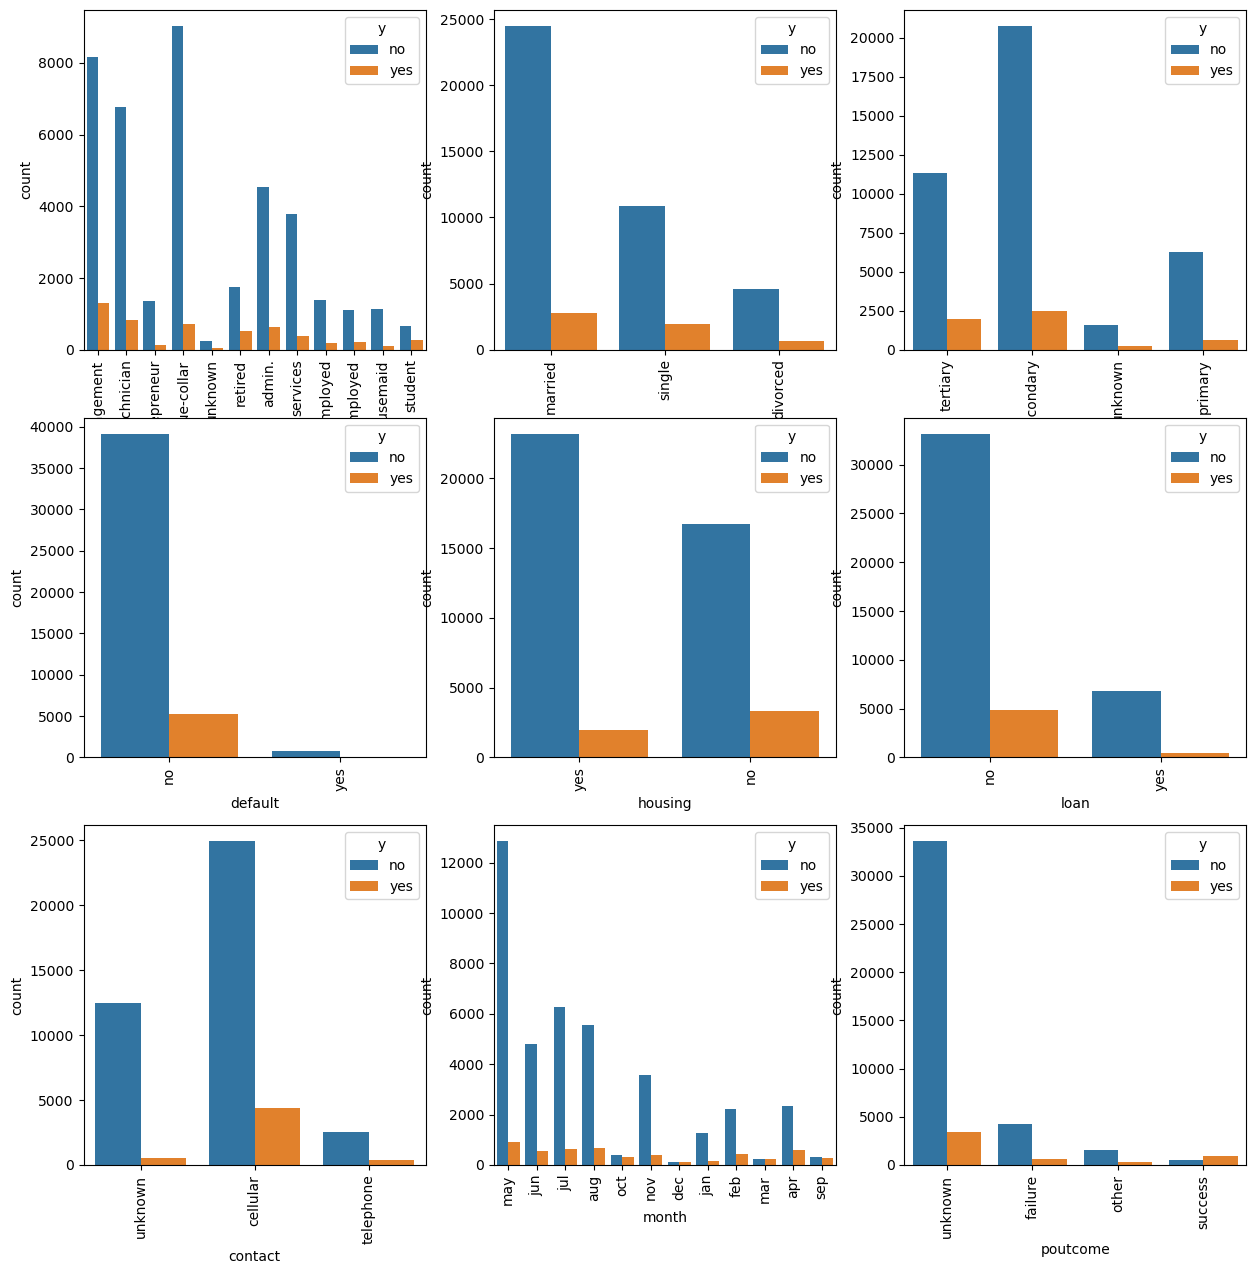

In [10]:
# Plot categorical variable
categorical_data=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in categorical_data:
    if plotno<=9: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.countplot(x=data[column],hue='y',data=data)
        plt.xticks(rotation=90)
        plotno+=1 ## counter increment
# show plot
plt.show()

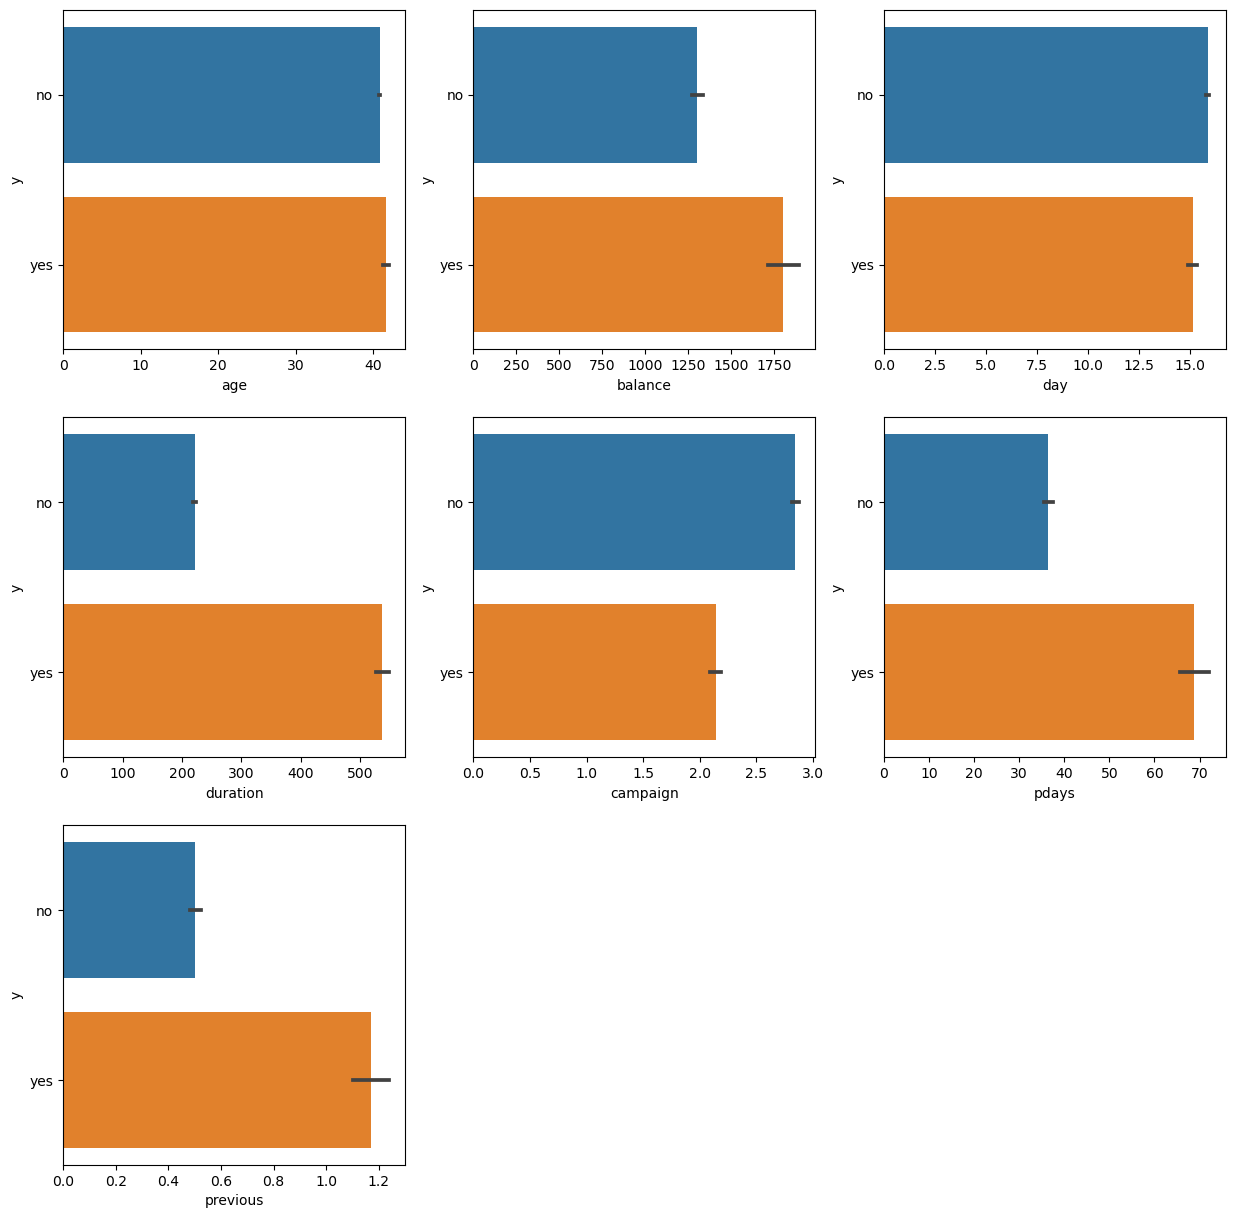

In [11]:
# Plot numerical features
numerical_data=['age','balance','day','duration', 'campaign', 'pdays','previous']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in numerical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.barplot(y='y',x=data[column],data=data)
        plotno+=1 ## counter increment
# show plot
plt.show()

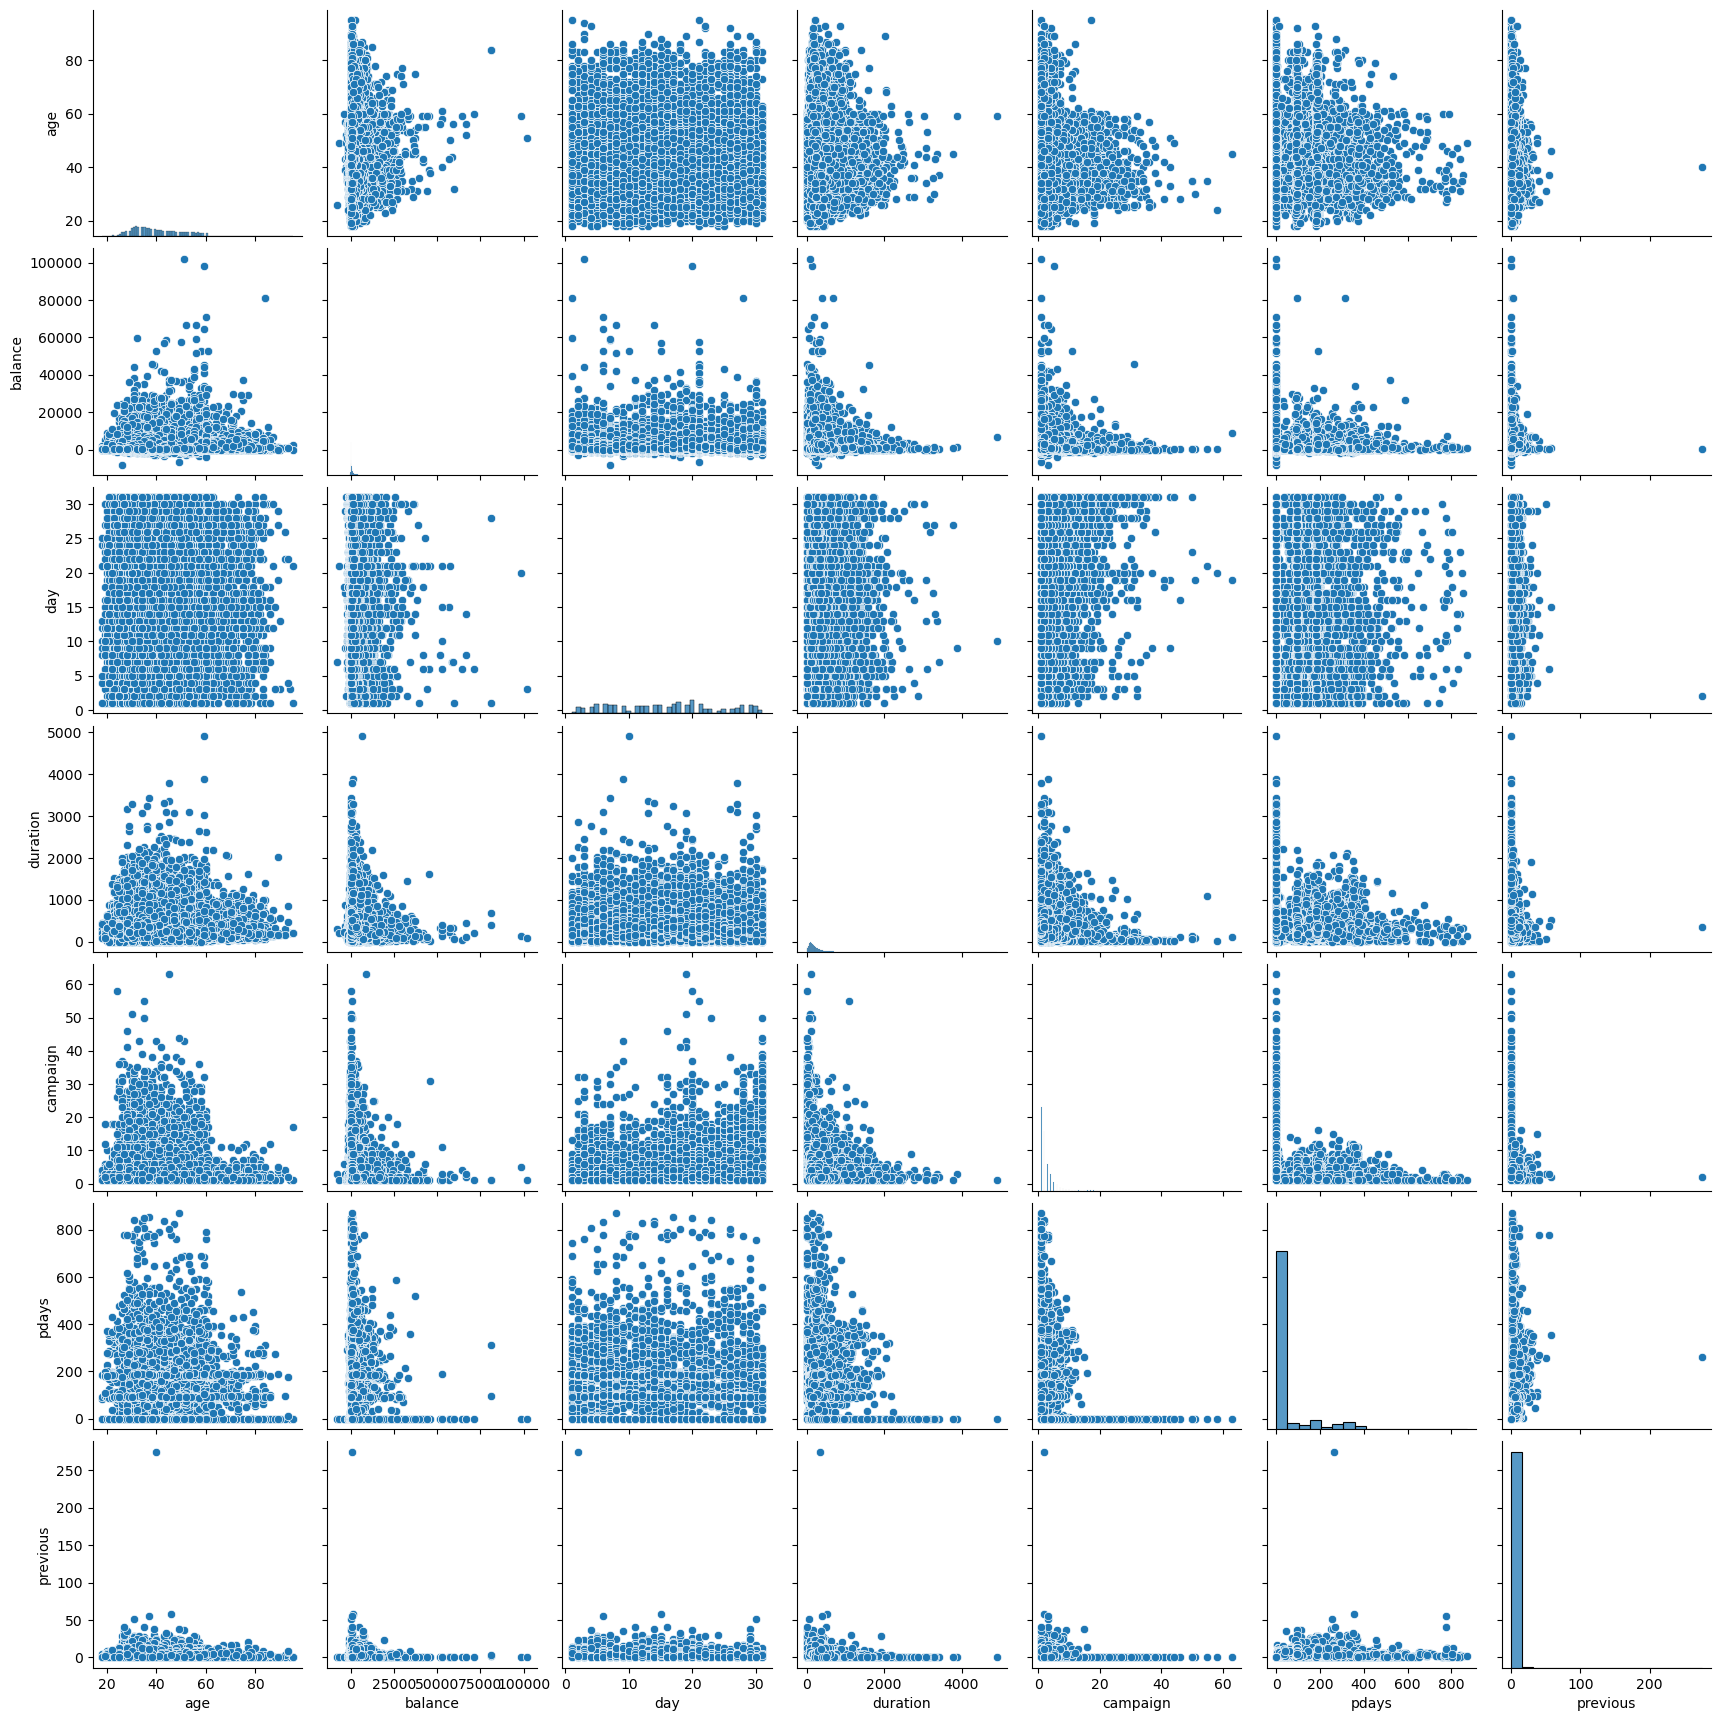

In [12]:
sns.pairplot(data)

### Data Preprocessing

In [13]:
# Check missing values in data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* No missing values present in dataset.

In [14]:
# Counts of Job
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
# Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [16]:
data.job = lb.fit_transform(data.job)

In [17]:
# Counts of Marital
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [18]:
data.marital = lb.fit_transform(data.marital)

In [19]:
# Counts of Education
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [20]:
data.education = lb.fit_transform(data.education)

In [21]:
# Counts of default
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [22]:
data.default = lb.fit_transform(data.default)

In [23]:
# Counts of housing
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [24]:
data.housing = lb.fit_transform(data.housing)

In [25]:
# Counts of loan
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [26]:
data.loan = lb.fit_transform(data.loan)

In [27]:
# Counts of contact
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [28]:
data.contact = lb.fit_transform(data.contact)

In [29]:
# Counts of month
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [30]:
data.month = lb.fit_transform(data.month)

In [31]:
# Counts of poutcome
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [32]:
data.poutcome = lb.fit_transform(data.poutcome)

In [33]:
# Counts of poutcome
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [34]:
data.y = lb.fit_transform(data.y)

In [35]:
# After Preprocessing
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [36]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

## Feature Selection

In [37]:
# Check redundant features
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


<AxesSubplot:>

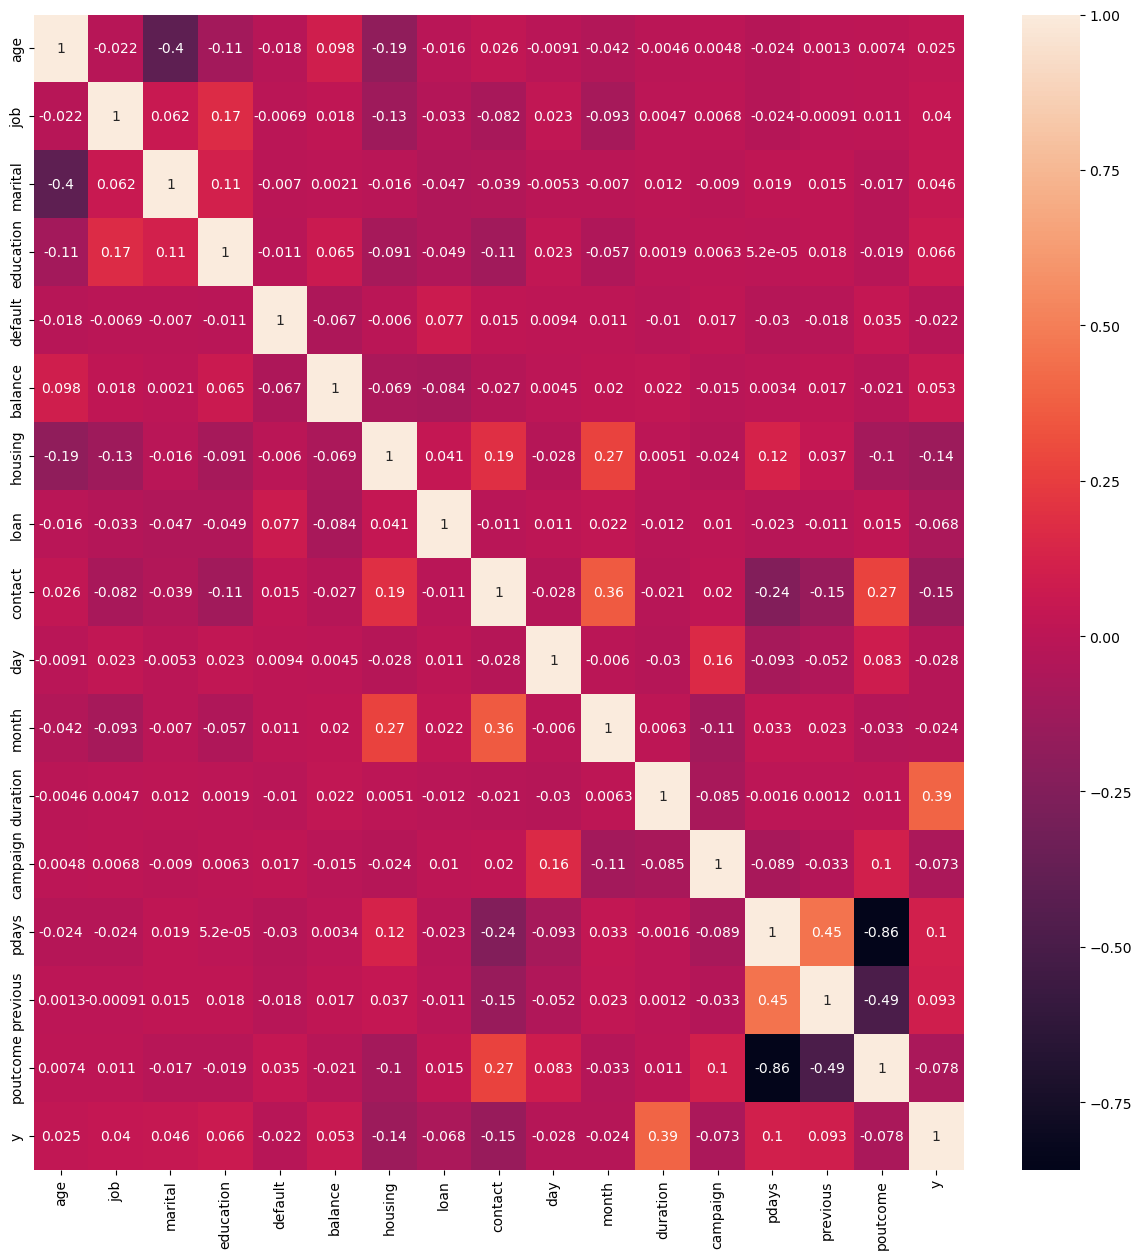

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

## Model Selection and Building

In [39]:
# Creating Dependent & Independent variable
x = data.drop(['y'],axis=1)
y = data['y']

In [40]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 88.63904452963727


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



### Bagging Classifier

In [47]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [48]:
y_pred = bc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 89.74491300501327


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.60      0.40      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564



### Naive Bayes

In [51]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [52]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 86.24299616632261


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11966
           1       0.36      0.21      0.27      1598

    accuracy                           0.86     13564
   macro avg       0.63      0.58      0.59     13564
weighted avg       0.84      0.86      0.85     13564



### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 90.4452963727514


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.64      0.42      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564



### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 87.35623709820112


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.45      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



### Support Vector Machine

In [63]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [64]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 88.2188145089944


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.50      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564

